# This code uses the new discrete code

In [1]:
import os
import sys
import collections
import tensorflow as tf
from importlib import reload

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
a = os.path.join(module_path, "strands_qsr_lib\qsr_lib\src3")

sys.path.append(a)

## PLOTTING 
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import plotting


### IMPORT FROM CURRENT PROJECT
import progress_learner
import config
import project
from project import Project

### RL module
from rl import action_learner, action_learner_search, value_estimator
from rl import block_movement_env
from rl import discrete_value_estimator as  dve
from rl import discrete_action_learner as dal

C:\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
reload(dal)
dal._test_get_action_from_quantized_states()

The action from (2, 1) to (1, 0) is illegal
The action 2 from (2, 1) to (2, 0)
The action from (2, 1) to (3, 0) is illegal
The action 3 from (2, 1) to (1, 1)
The action 0 from (2, 1) to (2, 1)
The action 1 from (2, 1) to (3, 1)
The action from (2, 1) to (1, 2) is illegal
The action 4 from (2, 1) to (2, 2)
The action from (2, 1) to (3, 2) is illegal


In [3]:
dal._test_realize_action()

quantized (1, 1.0)
action [0.4767767 0.5767767 0.       ]
requantized (0, 1.0)
action [0.65355339 0.75355339 0.        ]
requantized (1, 1.0)
action [0.55 0.4  0.  ]
requantized (0, 0.0)
action [0.83033009 0.93033009 0.        ]
requantized (2, 1.0)
action [0.3  0.65 0.  ]
requantized (0, 2.0)


In [179]:
### RELOAD modules here
reload(config)
reload(value_estimator)
reload(config)
reload(block_movement_env)
reload(action_learner_search)
reload(progress_learner)
reload(dal)
reload(dve)


### MAIN CODE
tf.reset_default_graph()

c = config.Qual_Plan_Config()

global_step = tf.Variable(0, name="global_step", trainable=False)


policy_est = dve.DiscretePolicyEstimator(c)
value_est = dve.ValueEstimator(c)

sess =  tf.Session()

sess.run(tf.global_variables_initializer())

projects = {}
progress_estimators = {}

# action_types = ["SlideToward", "SlideAway", "SlideNext", "SlidePast", "SlideAround"]
action_types = ["SlideAround"]

for project_name in action_types:
    print ('========================================================')
    print ('Load for action type = ' + project_name)
    p_name = project_name.lower() + "_project.proj"

    projects[project_name] = project.Project.load(os.path.join('..' , 'learned_models', p_name))

    with tf.variable_scope("model") as scope:
        print('-------- Load progress model ---------')
        progress_estimators[project_name] = progress_learner.EventProgressEstimator(is_training = False,
                                                                                    is_dropout = False, 
                                                                                    name = projects[project_name].name, 
                                                                                    config = c)  

# Print out all variables that would be restored
for variable in tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'):
    print (variable.name)

for project_name in action_types:
    saver = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model/' + project_name))

    saver.restore(sess, os.path.join('..' , 'learned_models', 'progress_' + project_name + '.mod.1'))

Load for action type = SlideAround
-------- Load progress model ---------
self.inputs.shape = (?, 20, 200)  after linear layer
output.shape = (30, 200) after LSTM
self.output.shape = (30,) after linear
self._targets.shape = (?,) 
model/SlideAround/linear/weight:0
model/SlideAround/linear/bias:0
model/SlideAround/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel:0
model/SlideAround/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias:0
model/SlideAround/output_linear/weight:0
model/SlideAround/output_linear/bias:0
INFO:tensorflow:Restoring parameters from ..\learned_models\progress_SlideAround.mod.1


In [ ]:
#reload(dal)
c.num_episodes = 2000

# Effective number of steps would be limit_step // (breadth + 1)
action_ln = dal.DiscreteActionLearner(c, projects['SlideAround'], progress_estimators['SlideAround'], 
                               policy_est, value_est, session = sess, limit_step = 12)

past_envs, stats = action_ln.policy_learn(dal.random_action, breadth = 1, verbose = False,
                                          choice = 'ACTOR_CRITIC', default = False)

Step 2 @ Episode 237/2000 (0.002191900508478284))

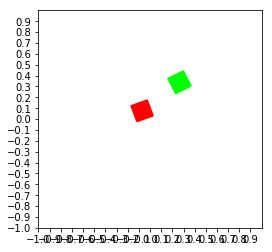

(None, None)
[-0.21110726  0.4947635   0.46863362]
[[ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [-1.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.   0.   0.  -1.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]]
Progress = 0.42; reward = 0.42


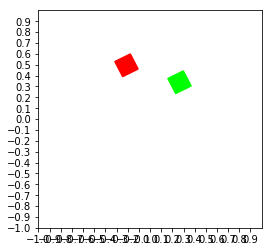

(None, None)
[0.03818302 0.78510978 0.46863362]
[[ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [-1.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.   0.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]]
Progress = 0.34; reward = -0.08


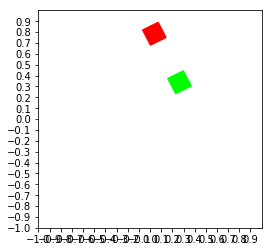

(None, None)
[0.4197637  0.81414075 0.46863362]
[[ 0.   0.   0.   0.   0.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [-1.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.   0.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [-1.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]]
Progress = 0.25; reward = -0.09


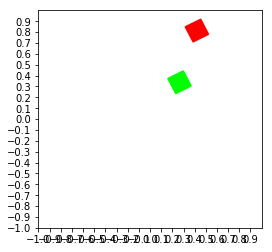

(None, None)
[0.71010998 0.56485047 0.46863362]
[[ 0.   0.   0.   0.   0.   0.  -0.5]
 [-1.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.   0.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [-1.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0. ]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]]
Progress = 0.01; reward = -0.24


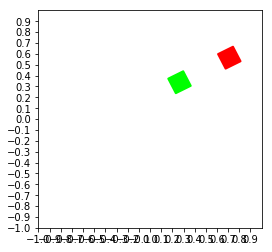

(None, None)
[0.73914095 0.18326979 0.46863362]
[[ 0.   0.   0.   0.   0.   0.  -0.5]
 [ 0.   0.   0.   0.   0.   0.  -0.5]
 [ 0.   0.   0.   0.   0.   0.  -0.5]
 [ 0.   0.   0.   0.   0.   0.  -0.5]
 [-1.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.   0.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [-1.   1.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]]
Progress = 0.31; reward = 0.31


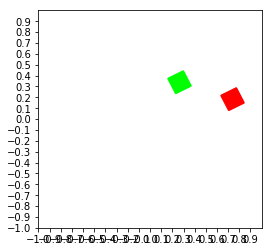

(None, None)
[ 0.48985066 -0.10707649  0.46863362]
[[-1.  0. -1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [-1.  0. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [-1.  0. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [-1.  0. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [-1.  0. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]]
Progress = 0.11; reward = -0.20


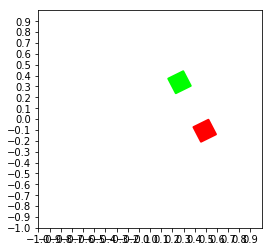

In [157]:
past_envs[99].env.replay(verbose = True)

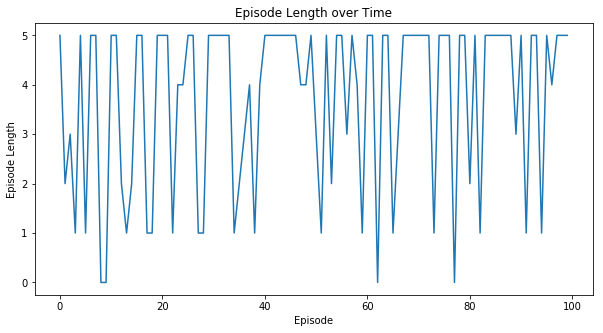

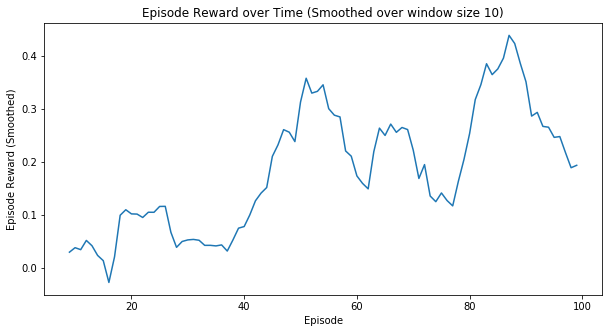

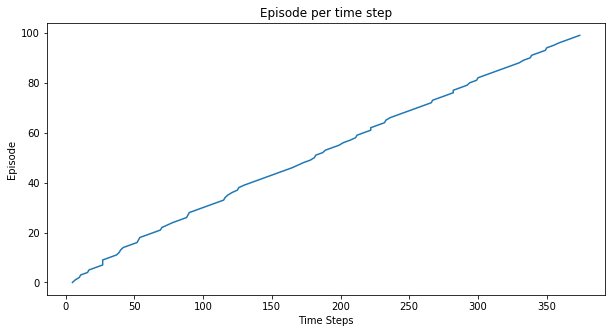

(<matplotlib.figure.Figure at 0x21e0cb46438>,
 <matplotlib.figure.Figure at 0x21e0c5af128>)

In [158]:
plotting.plot_episode_stats(stats, smoothing_window=10)

In [5]:
reload(block_movement_env)
#reload(progress_learner)
bme = block_movement_env.BlockMovementEnv(c, projects['SlideAround'].speed, projects['SlideAround'].name, 
                progress_estimator = progress_estimators['SlideAround'], session = sess)

In [177]:
import numpy as np
for progress in range(5):
    for pos in range(6):
        for prev_action in range(5):
            print ('pos = %d, prev_action = %d, progress = %d' % (pos, prev_action, progress) )

            state = np.zeros(150)
            index = int(pos * 25 + prev_action * 5 + progress)

            state[index] = 1

            probs = policy_est.predict(state, sess = sess)

            best_action = np.argmax(probs)
            print ('probs = %s, best_action = %d' % (probs, best_action) )
        


pos = 0, prev_action = 0, progress = 0
probs = [0.2210772  0.11128996 0.22072898 0.16823794 0.27866593], best_action = 4
pos = 0, prev_action = 1, progress = 0
probs = [0.18596216 0.17393148 0.21214718 0.20150663 0.22645256], best_action = 4
pos = 0, prev_action = 2, progress = 0
probs = [0.18505824 0.1988916  0.20902583 0.19497392 0.2120505 ], best_action = 4
pos = 0, prev_action = 3, progress = 0
probs = [0.18461674 0.233032   0.21219382 0.18170063 0.18845674], best_action = 1
pos = 0, prev_action = 4, progress = 0
probs = [0.2475233  0.1971919  0.17846945 0.18297222 0.19384322], best_action = 0
pos = 1, prev_action = 0, progress = 0
probs = [0.24667038 0.15157223 0.3070143  0.121259   0.17348406], best_action = 2
pos = 1, prev_action = 1, progress = 0
probs = [0.19399182 0.210037   0.21462521 0.21363978 0.1677062 ], best_action = 2
pos = 1, prev_action = 2, progress = 0
probs = [0.19273807 0.22036882 0.16523276 0.20534681 0.21631356], best_action = 1
pos = 1, prev_action = 3, progre

probs = [0.23515387 0.16877945 0.17661548 0.20417117 0.21528003], best_action = 0
pos = 0, prev_action = 4, progress = 4
probs = [0.2011334  0.22626902 0.1909564  0.18857473 0.19306643], best_action = 1
pos = 1, prev_action = 0, progress = 4
probs = [0.2018666  0.20475556 0.230954   0.17708783 0.18533604], best_action = 2
pos = 1, prev_action = 1, progress = 4
probs = [0.18142892 0.22652204 0.19000946 0.17939991 0.2226396 ], best_action = 1
pos = 1, prev_action = 2, progress = 4
probs = [0.18862517 0.17691934 0.20552005 0.17899445 0.24994095], best_action = 4
pos = 1, prev_action = 3, progress = 4
probs = [0.2349477  0.18951814 0.21987817 0.18457553 0.17108046], best_action = 0
pos = 1, prev_action = 4, progress = 4
probs = [0.20873266 0.18922544 0.18438095 0.20119613 0.21646486], best_action = 4
pos = 2, prev_action = 0, progress = 4
probs = [0.22316822 0.21879931 0.18116598 0.18555745 0.19130899], best_action = 0
pos = 2, prev_action = 1, progress = 4
probs = [0.23612165 0.1724791  0

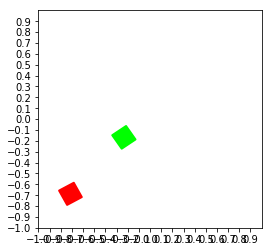

(None, None)
[-0.75  0.5   0.5 ]
[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [ 0. -1. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [-1. -1. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0. -1.  0.  0.]
 [-1.  0.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0. -1.  0.  0.]]
Progress = 0.56; reward = 0.59


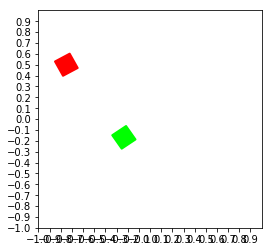

(None, None)
[-0.75  0.5   0.5 ]
[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [ 0. -1. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [-1. -1. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0. -1.  0.  0.]
 [-1.  0.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0. -1.  0.  0.]]
Progress = 0.57; reward = 0.03


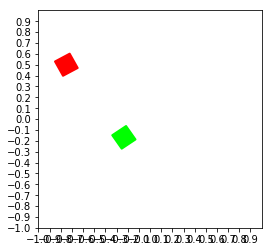

(None, None)
[-0.3   0.55  0.5 ]
[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [ 0. -1. -1.  0. -1.  0.  0.]
 [-1.  0. -1.  0. -1.  0.  0.]
 [ 0. -1. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [-1.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  1.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [-1. -1. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.]]
Progress = 0.55; reward = -0.09


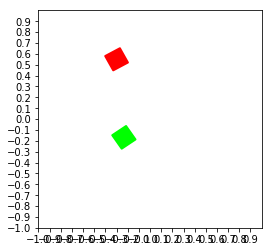

In [120]:
bme.replay(verbose = True)